# Bienvenidos al Taller de $${\rm PBH-}\beta$$

## Autores: Tadeo D. Gómez-Aguilar & Luis E. Padilla
### Licence: GNU General Public License v2.0. The documentation is licensed under the GFDL.

<div style="text-align:center">
    <img src="docs/img/Beta_img.png" alt="Descripción de la imagen" style="width:50%">
</div>


# INTRODUCCIÓN

#### La biblioteca PBHBeta es una herramienta computacional diseñada para calcular restricciones sobre la abundancia de Agujeros Negros Primordiales (PBHs) y el espectro de potencia (PS) en escenarios cosmológicos que presentan una fase de evolución no estándar entre el final de la inflación y el inicio de la nucleosíntesis primordial (BBN)

### Casos de uso comunes

#### Actualmente PBHBeta ha sido empleado para evaluar las diferentes restricciones a la abundancia de Agujeros Negros Primordiales (PBHs). 

#### 

## Requisitos previos y dependencias

Las bibliotecas imperativas necesarias son las siguientes:

**NumPy:** NumPy es una biblioteca fundamental de Python que facilita el trabajo con matrices multidimensionales y operaciones matemáticas de alto rendimiento. Se utiliza extensamente en ciencia de datos y computación científica debido a su eficiencia, capacidades de álgebra lineal e integración perfecta con otras bibliotecas de Python. NumPy es esencial para cálculos matemáticos intrincados y manipulación de datos numéricos.

Para instalar, copia y pega el siguiente comando:

```sh
pip install numpy
```

**SciPy:** SciPy extiende las capacidades de NumPy y ofrece funcionalidades adicionales para la computación científica. Incluye herramientas para integración, optimización, interpolación, procesamiento de señales e imágenes, funciones estadísticas y más.

Para instalar, copia y pega el siguiente comando:

```sh
pip install scipy
```

**Matplotlib:** Matplotlib es una biblioteca que permite la creación de diversos tipos de gráficos y diagramas en Python.

Para instalar, copia y pega el siguiente comando:

```sh
pip install matplotlib
```

Alternativamente, puedes instalar todas estas bibliotecas en un solo comando:

```sh
pip install matplotlib numpy scipy
```


## Cómo instalar PBH-Beta

**1. Clonación del Repositorio de GitHub**

Para clonar el repositorio de GitHub, ejecuta el siguiente comando:

```bash
git clone https://github.com/TadeoDGAguilar/PBHBeta.git
```

Después de clonar el repositorio, navega al directorio PBHBeta:

```bash
cd PBHBeta
```

Luego, instala PBHBeta usando pip:

```bash
pip3 install -e .
```

**2. Instalación a través de pip**

Para una instalación sencilla desde PyPI, utiliza el siguiente comando:

```bash
pip3 install PBHBeta
```

Esto instalará la versión más reciente de PBHBeta desde PyPI.

**3. Instalación sin clonar**

Alternativamente, puedes instalar PBHBeta directamente desde el repositorio de GitHub:

```bash
pip install -e git+https://github.com/TadeoDGAguilar/PBHBeta.git
```

**4. Usando PBHBeta en Google Colab**

```
%pip install numpy matplotlib scipy
!pip install -e git+https://github.com/TadeoDGAguilar/PBHBeta#egg=PBHBeta
%cd /content/src/pbhbeta
```

# 1. Inicio rápido

A continuación se muestra un ejemplo sencillo de uso PBHBeta. Cada aspecto se explicará en las secciones siguientes.

## Importación de módulos

Nota: Para verificar la corrrecta instalación de los requisitos, vamos a importar PBH-Beta junto con sus módulos

In [1]:
from PBHBeta import *
import matplotlib.pyplot as plt
import numpy as np

## 1.3 Funciones básicas

Las funciones básicas ayudan a crear matrices de datos de entrada y a resolver ecuaciones diferenciales ordinarias, estas funciones son auxiliares y componen el calculo numerico de las abudancias de PBHs.

```
PBHBeta.functions.put_M_array ( Masa_mínima , Masa_máxima )
Generar una matriz de masas de agujeros negros primordiales (PBH) en gramos según límites específicos.

Parámetros:
Mass_min (float): El valor mínimo de masa de PBH en gramos. Mass_max (float): El valor máximo de masa de PBH en gramos.

Devoluciones:
np.ndarray: Un arreglo de masas de PBHs.
```

In [2]:
functions.put_M_array(constants.M_pl_g, 1e20)

array([2.17645000e-05, 3.82939655e-05, 6.73770496e-05, ...,
       9.63604110e+19, 9.91285249e+19, 1.01976158e+20])

In [3]:
print(constraints.M_tot)

[2.17645000e-05 3.82939655e-05 6.73770496e-05 ... 9.63604110e+19
 9.91285249e+19 1.01976158e+20]


In [4]:
M_pbh = np.array(constraints.M_tot)

In [5]:
print(M_pbh)

[2.17645000e-05 3.82939655e-05 6.73770496e-05 ... 9.63604110e+19
 9.91285249e+19 1.01976158e+20]


## Masa y fracción de PBHs

El escenario estándar para explicar los PBHs es el siguiente: si una perturbación al momento de reingresar al horizonte excede un valor umbral, $\delta_c$, colapsará para formar un PBH. Este valor umbral depende en gran medida de la morfología de la perturbación inicial que colapsará para formar el PBH \citep{Musco:2018rwt}. En la cosmología estándar de RD, el valor umbral es \citep{Niemeyer:1997mt,Musco:2008hv,Harada:2013epa,Musco:2018rwt,PhysRevD.101.044022,PhysRevD.103.063538}
\begin{equation}
\delta_c^{(\rm RD)} = 0.41-0.66\,.
\end{equation}
En este manuscrito, utilizaremos $\delta_c^{\rm (RD)} = 0.41$, ya que es el valor más comúnmente utilizado en la literatura.

La masa de un PBH es igual a una fracción de la masa total del horizonte en el momento del cruce del horizonte, 
%\lu{i.e. for a $k$ scale that reenters the horizon
%\begin{equation}\label{Nhcr}
%N_{\rm H}^{(\rm RD)}(k) = \ln(k_{\rm end}/k)\,, 
%\end{equation}
%$e$-folds after the end of inflation and subsequently collapses to form a PBH, we have}
$M_{\rm PBH} = \gamma\,M_{H}|_{k = aH}$. Esto depende de la ecuación de estado de fondo, de la cantidad de $e$-folds transcurridos hasta el reingreso al horizonte como función del número de onda $k$ y de la dependencia funcional de la masa con respecto al número de onda. Por ejemplo, $\gamma$ es una constante que codifica la eficiencia del colapso y para una era RD es $\gamma^{(\rm RD)} = (1/3)^{3/2}$ \citep{PhysRevD.81.104019}. Podemos expresar la masa, $M_{\rm PBH}$ como \citep{Hidalgo:2022yed}
\begin{equation}\label{mass}
\frac{M_{\rm PBH}(k)}{7.1\times 10^{-2}~\rm{g}} =  \gamma^{(\rm RD)}\frac{1.8\times 10^{15}~\rm{GeV}}{H_{\rm HC}(k)}\,,
\end{equation}
%\begin{equation}\label{mass}
%\left(\frac{M_{\rm PBH}(k)}{7.1\times 10^{-2}~\rm{g}}\right) =  \gamma\left(\frac{1.8\times 10^{15}~\rm{GeV}}{H_{\rm end}}\right)\left(\frac{k_{\rm end}}{k}\right)^2\,,
%\end{equation}
%\JCH{Change the above equation to include the different background domination cases}
donde el subíndice $_{\rm HC}$ se utiliza para referirse a cantidades evaluadas en el momento del cruce del horizonte.% y hemos utilizado un superíndice $^{\rm (RD)}$ para indicar que estas cantidades son válidas para un escenario RD. %En lo que sigue, utilizaremos el límite superior actual de $H_{\rm end}$, es decir, $H_{\rm end} = 4.4\times 10^{13}~\rm{GeV}$ \citep{Planck:2018jri}.

En la cosmología estándar, se asume que los PBHs se forman casi instantáneamente después de que la escala de perturbación, $k$, reingresa al horizonte. Asumiendo una expansión cósmica adiabática, la fracción $\beta(M_{\rm PBH})\equiv \rho_{\rm PBH}(t_i)/\rho(t_i)$ de la masa del universo que colapsa en PBHs en su tiempo de formación, $t_i$, está dada por \citep{Carr:2020gox} 
\begin{equation}\label{eq_betap}
\beta \simeq 7.06\times 10^{-18}\Omega^0_{\rm PBH}\left(\frac{M_{\rm PBH}}{10^{15}~\rm{g}}\right)^{1/2}\,.
\end{equation}
En la expresión anterior 
\begin{equation}
\beta^{'}\equiv (\gamma^{(\rm RD)})^{1/2}\left(\frac{g_{*i}}{106.75}\right)^{-1/4}\left(\frac{h}{0.67}\right)^{-2}\beta\,,    \label{beta:betaprime}
\end{equation}
donde $g_{*i}$ es el número de grados de libertad relativistas en el momento de la formación, $h$ es el parámetro de Hubble reducido, %y es igual a $h = 0.67$ \citep{Planck:2018jri}, 
y $\Omega^{0}_{\rm PBH}\equiv \rho_{\rm PBH}(t_0)/\rho_{\rm crit}(t_0)$ es el parámetro de densidad actual de los PBHs. Las Eqs.~\eqref{eq_betap} y \eqref{beta:betaprime} son, por supuesto, dependientes de la materia dominante, como mostraremos en la siguiente sección.

Una vez que los PBHs se forman, pierden masa a través de la radiación de Hawking \citep{Hawking:1974rv} y su masa como función del tiempo cósmico, $t$, cambia como \citep{Dalianis:2021dbs}
\begin{equation}\label{teva}
  M_{\rm PBH}(t) = M_{\rm PBH}(t_{i})\left(1-\frac{t-t_i}{\Delta t_{\rm eva}}\right)^{1/3}\,,   
\end{equation}
donde $\Delta t_{\rm eva}$ es el tiempo en el cual un PBH se evapora completamente% y es igual a
\begin{equation}
\Delta t_{\rm eva} \equiv t_{\rm eva}-t_i=t_{\rm Pl}\left(\frac{M_{\rm PBH}(t_{i})}{M_{\rm Pl}}\right)^{3}\,,
\end{equation}
y $t_{\rm Pl}$ ($M_{\rm Pl}$) es el tiempo de Planck (masa). Por lo tanto, solo los PBHs con masas $M_{\rm PBH} \gtrsim 10^{15}$ g deberían prevalecer.
%At the present time it is expected that only 
Para calcular cómo esta pérdida de masa afecta la abundancia de PBHs, podemos proceder de la siguiente manera. Si definimos $\bar\beta$ como la fracción de masa en ausencia de radiación de Hawking, podemos expresar $\Omega_{\rm PBH}(M;t)$ como \citep{Martin:2019nuw}
\begin{equation}\label{omx}
\Omega_{\rm PBH}(M_{\rm PBH};t) = \bar\beta(M_{\rm PBH};t)\left(1-\frac{t-t_i}{\Delta t_{\rm eva}}\right)^{1/3}\,.
\end{equation}
Siguiendo la descripción en \citep{Martin:2019nuw}, descomponemos $\bar\beta(M_{\rm PBH};\,t)$ como $\bar\beta(M_{\rm PBH};\,t) = b(t)\bar\beta(M_{\rm PBH},\,t_{i})$, donde $b(t)$ resuelve la ecuación diferencial 
\begin{equation}\label{b}
\dot b(t)+\left(\frac{\dot \rho_{\rm tot}}{\rho_{\rm tot}}+3H\right)b(t) = 0\,.
\end{equation}
Aquí $\rho_{\rm tot}$ es la densidad de energía total del universo de fondo. En este trabajo, evolucionamos esta ecuación diferencial desde el tiempo de formación de los PBH hasta la época de BBN, que tiene lugar en $\rho_{\rm BBN}^{1/4} = 100~\rm{MeV}$ (un valor referencial). En la cosmología estándar, tenemos $\rho_{\rm tot} \approx \rho_{\rm rad}+\rho_{\rm PBH}$ y $\rho_{\rm rad}(t_i)\gg \rho_{\rm PBH}(t_i)$. Por lo tanto, reescribimos la Eq.~\eqref{b} como
\begin{equation}\label{eqdb}
\frac{db}{d\ln \rho_{\rm tot}}+ b\,\frac{\Omega_{\rm{PBH}}-1}{\Omega_{\rm PBH}-4} = 0\,.
\end{equation}
Para calcular el parámetro de densidad, Eq.~\eqref{omx} necesitamos calcular $t-t_i$. Este tiempo se calcula a partir de la ecuación diferencial
%\begin{subequations}\


```
Funciones PBHBeta.diff_rad_rel ( ln_rho , inicial , M , beta0 )
```

```
Funciones PBHBeta.diff_rad ( ln_rho , inicial , M , beta0 )
```


```
Funciones PBHBeta.end_evol ( ln_rho , initial , M , beta0 )
```


Según el formalismo de Press-Schechter \cite{Press:1973iz}, la fracción de la densidad de energía del universo contenida en una región con tamaño $R$, que es lo suficientemente sobredensa como para formar PBHs, está dada por \cite{Carr:1975qj} 
\begin{eqnarray}\label{PS2}
\beta(M_{\rm pbh}) &=&\gamma \int_{\delta_c}^{\infty} \frac{d\delta}{\sqrt{2\pi\,\sigma^2_\delta(R)}} \, \exp\left(-\frac{\delta^2}{2\,\sigma^{2}_\delta(R)}\right)\nonumber\\
&=& \frac{\gamma}{2}\,{\rm erfc}\left(\frac{\delta_c}{\sqrt{2\sigma^{2}}}\right)\,,
\end{eqnarray}
donde ${\rm erfc}(x) = 1 - {\rm erfc}(x)$ es la función de error complementaria y la varianza de $\delta$ está dada por
\begin{eqnarray}
\sigma^2(R) &=&\frac{4(1+\omega)^2}{(5+3\omega)^2} \int_0^{\infty}(kR)^2W^2(kR)\,\mathcal{P}_\zeta(k)\,\frac{dk}{k},\nonumber\\ 
&\simeq& \frac{4(1+\omega)^2}{(5+3\omega)^2}\mathcal{P}_\zeta(k).\label{sigma_square}
\end{eqnarray}
Aquí, $W(k,\,R)$ es la transformada de Fourier de la función de ventana utilizada para suavizar el contraste de densidad en una escala comóvil $R$.

Cabe destacar que cualquier restricción sobre $\beta(M_{\rm PBH})$ impone así una restricción sobre $\sigma$ y, de manera equivalente, sobre el espectro de potencias, $\mathcal{P}_\zeta (k)$. En tal correspondencia, la dependencia del fondo dominante de materia radica tanto en la amplitud umbral, $\delta_c$, para la formación de PBH, como en la relación entre la varianza y el espectro de potencias.


In [6]:
beta_dm_rad = functions.Betas_DM(M_pbh,1/3)[1]

/Users/thaddaios/Documents/PBHBeta_BASE/PBHBeta-main/PBHBeta/functions.py:86: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 = beta0 * b * (1. - time / Delta_t) ** (1. / 3)


In [7]:
M_dm_rad = functions.Betas_DM(M_pbh, 1/3)[0]

In [8]:
beta_dm_reliq = functions.Betas_DM(M_pbh, 1/3)[3]
M_reliq = functions.Betas_DM(M_pbh, 1/3)[2]

In [ ]:
#omegas_dm = constraints.Omega_DM_tot

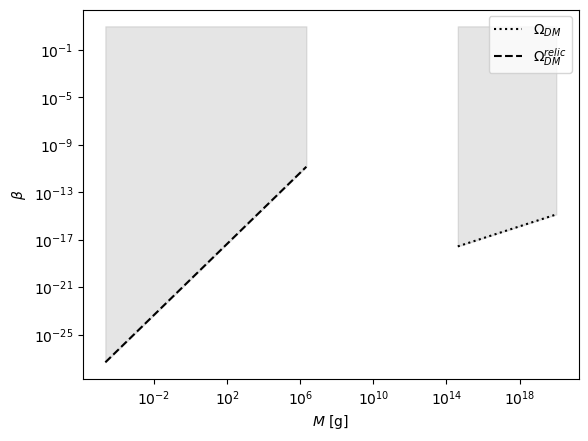

In [9]:
plt.loglog(M_dm_rad, beta_dm_rad, "k:",label=r"$\Omega_{DM}$")
plt.fill_between(M_dm_rad, beta_dm_rad, beta_dm_rad*0+10, color='grey',alpha=0.2)
plt.loglog(M_reliq, beta_dm_reliq, "k--",label=r"$\Omega_{DM}^{relic}$")
plt.fill_between(M_reliq, beta_dm_reliq, beta_dm_reliq*0+10, color='grey',alpha=0.2)
plt.xlabel(r"$M~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.legend()
plt.show()

### Now, we calculate the constraints in the PPS by assuming that
\begin{equation}
\beta = Erfc\left(\frac{\delta_c}{\sqrt{2}\sigma}\right), \ \ \ \ \Rightarrow \ \ \ \ \sigma = \frac{\delta_c}{\sqrt{2}Erfc^{-1}(\beta)},
\end{equation}
with $\sigma^2\sim P(k)$ and $\delta_c = 0.41$ in the radiation case.

In [10]:
k_DM, P_k_DM = PfR.get_P_k_RD(M_dm_rad, beta_dm_rad, 0.41)

In [11]:
k_DM_reliq, P_k_DM_reliq = PfR.get_P_k_RD(M_reliq, beta_dm_reliq, 0.41)

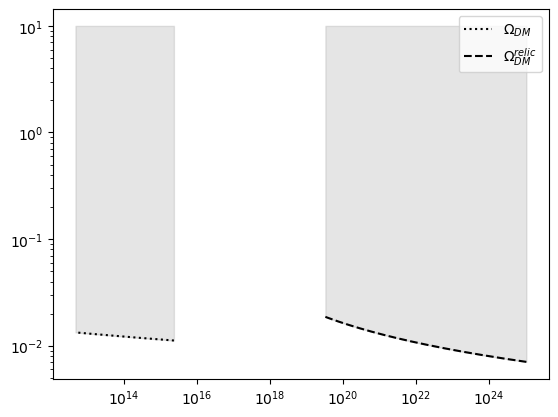

In [12]:
plt.loglog(k_DM, P_k_DM, "k:",label=r"$\Omega_{DM}$")
plt.fill_between(k_DM, P_k_DM, P_k_DM*0+10, color='grey',alpha=0.2)

plt.loglog(k_DM_reliq, P_k_DM_reliq, "k--",label=r"$\Omega_{DM}^{relic}$")
plt.fill_between(k_DM_reliq, P_k_DM_reliq, P_k_DM_reliq*0+10, color='grey',alpha=0.2)
plt.legend()
plt.show()

In [14]:
k_10s_dm, P_k_10_dm, beta_10_dm = PfM.get_P_k_MD(M_dm_rad,10,0,1)

In [15]:
k_20s_dm, P_k_20_dm, beta_20_dm = PfM.get_P_k_MD(M_dm_rad,20,0,1)

In [16]:
k_30s_dm, P_k_30_dm, beta_30_dm = PfM.get_P_k_MD(M_dm_rad,30,0,1)

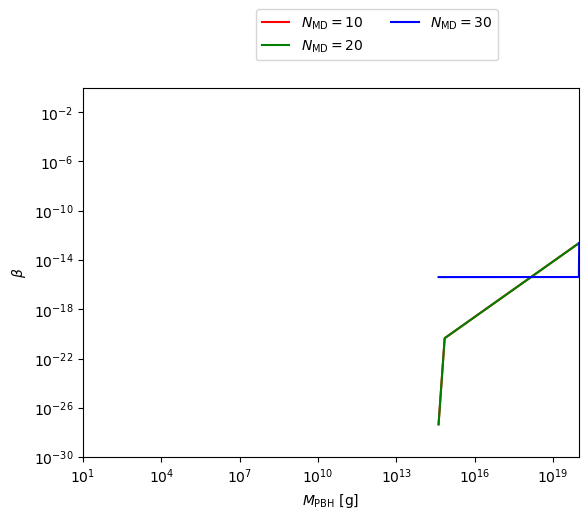

In [20]:
plt.loglog(M_dm_rad,beta_10_dm, label = r"$N_{\rm MD}=10$",color='red')
plt.loglog(M_dm_rad,beta_20_dm, label = r"$N_{\rm MD}=20$",color='green')
plt.loglog(M_dm_rad,beta_30_dm, label = r"$N_{\rm MD}=30$",color='blue')
plt.ylim([1e-30,1])
plt.xlim([1e1,1e20])
plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")

plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.23))
plt.show()

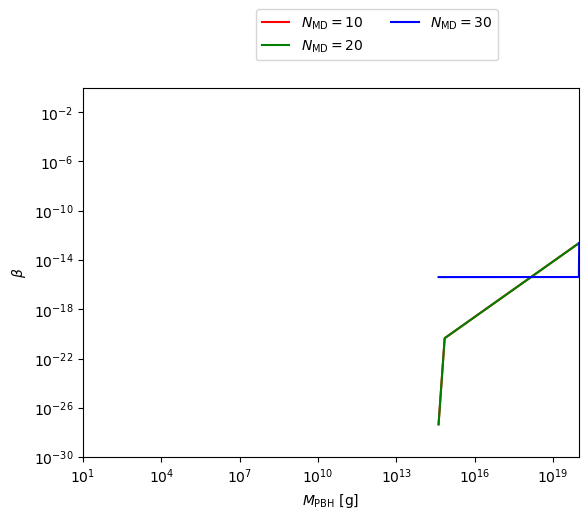

In [60]:
#plt.loglog(constraints.data_M_tot,constraints.data_beta_full, label = "SBB", color='black')
plt.loglog(M_dm_rad,beta_10_dm, label = r"$N_{\rm MD}=10$",color='red')
plt.loglog(M_dm_rad,beta_20_dm, label = r"$N_{\rm MD}=20$",color='green')
plt.loglog(M_dm_rad,beta_30_dm, label = r"$N_{\rm MD}=30$",color='blue')
#plt.loglog(constraints.data_M_tot,constraints.data_beta_full, color='black')
plt.ylim([1e-30,1])
plt.xlim([1e1,1e20])
plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")

plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.23))
plt.show()

# Ejercicio 1

### Agregar a la grafica las restricciones a la abundancia de PBHs que se encuentran en el rango de reliquias de Planck

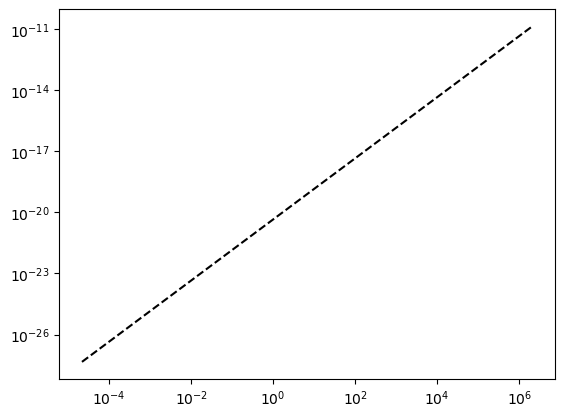

In [27]:
plt.loglog(M_reliq, beta_dm_reliq, "k--", label = r"$\Omega_{DM}^{relic}$")
plt.show()

In [28]:
k_rd_reliq, P_k_rd_reliq = PfR.get_P_k_RD(M_reliq, beta_dm_reliq, 0.41)

In [ ]:
functions.get_Betas_full(M_reliq)

In [ ]:
functions.get_Omegas_full(M_reliq)

In [29]:
k_10s_reliq, P_k_10_reliq, beta_10_reliq = PfM.get_P_k_MD(M_reliq,10,0,1)

/Users/thaddaios/Documents/PBHBeta_BASE/PBHBeta-main/PBHBeta/BfM.py:96: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 = beta0 * b * (1. - time / Delta_t) ** (1. / 3)
/Users/thaddaios/Documents/PBHBeta_BASE/PBHBeta-main/PBHBeta/BfM.py:98: RuntimeWarning: divide by zero encountered in double_scalars
  dy[1] = 3 ** (1. / 2) * M_pl / ((Om_0 + (1 - 3 * omega) * Om_ext - 4.) * np.exp(ln_rho) ** (1. / 2))


In [30]:
k_20s_reliq, P_k_20_reliq, beta_20_reliq = PfM.get_P_k_MD(M_reliq,20,0,1)

In [31]:
k_30s_reliq, P_k_30_reliq, beta_30_reliq = PfM.get_P_k_MD(M_reliq,30,0,1)

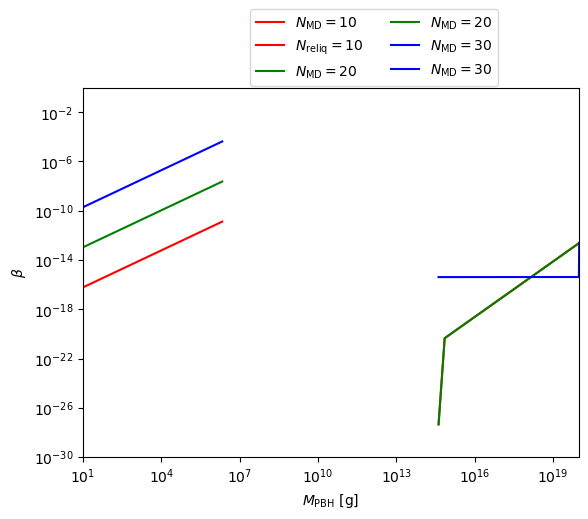

In [59]:
plt.loglog(M_dm_rad,beta_10_dm, label = r"$N_{\rm MD}=10$",color='red')
plt.loglog(M_reliq, beta_10_reliq, label = r"$N_{\rm reliq}=10$",color='red')
plt.loglog(M_dm_rad,beta_20_dm, label = r"$N_{\rm MD}=20$",color='green')
plt.loglog(M_reliq, beta_20_reliq, label = r"$N_{\rm MD}=20$",color='green')
plt.loglog(M_dm_rad,beta_30_dm, label = r"$N_{\rm MD}=30$",color='blue')
plt.loglog(M_reliq, beta_30_reliq, label = r"$N_{\rm MD}=30$",color='blue')
#plt.loglog(constraints.data_M_tot,constraints.data_beta_full,label = "SBB", color='black')
plt.ylim([1e-30,1])
plt.xlim([1e1,1e20])
plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")

plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.23))
plt.show()

# Ejercicio 2

## Evaluar la abundancia de los PBHs considerando un escenario de Dominación de radiación.

#### a) Usa las funciones principales de la libreria.

#### b) Grafica las abundancias con respecto al rango de masas asociada.

### 1. Como primer paso vamos a usar las funciones principales para obtener la abundancia de PBHs en el escenario estandar; dominación de radiación.

In [35]:
omega = 1/3
M_bbn_rd = functions.Betas_BBN(M_pbh,omega)[0]
M_an_rd = functions.Betas_CMB_AN(M_pbh,omega)[0]
M_grb1_rd = functions.Betas_GRB(M_pbh,omega)[0]
M_grb2_rd = functions.Betas_GRB(M_pbh,omega)[1]
M_reio_rd = functions.Betas_Reio(M_pbh,omega)[0]
M_lsp_rd = functions.Betas_LSP(M_pbh,omega)[0]

In [34]:
betas_bbn = functions.Betas_BBN(M_pbh,omega)[1]
betas_sd = functions.Betas_SD(M_pbh,omega)[1]
betas_an = functions.Betas_CMB_AN(M_pbh,omega)[1]
betas_grb1 = functions.Betas_GRB(M_pbh,omega)[2]
betas_grb2 = functions.Betas_GRB(M_pbh,omega)[3]
betas_reio = functions.Betas_Reio(M_pbh,omega)[1]
betas_lsp = functions.Betas_LSP(M_pbh,omega)[1]

### 2. Como segundo paso procedemos a graficar las abundancias considerando las restricciones en un escenario estandar.

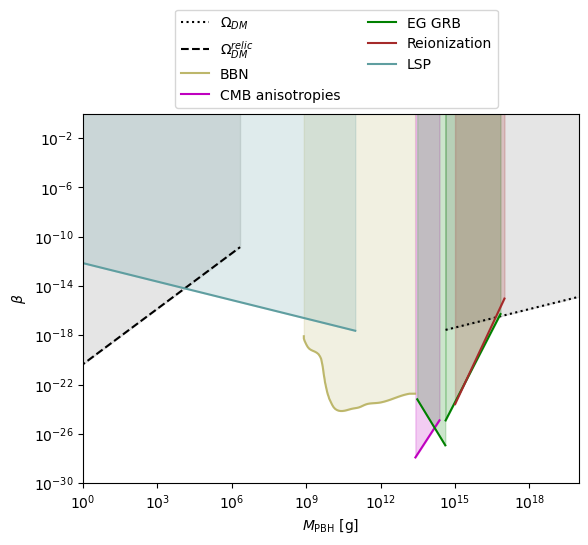

In [36]:
plt.loglog(M_dm_rad, beta_dm_rad, "k:",label=r"$\Omega_{DM}$")
plt.fill_between(M_dm_rad, beta_dm_rad, beta_dm_rad*0+10, color='grey',alpha=0.2)

plt.loglog(M_reliq, beta_dm_reliq, "k--",label=r"$\Omega_{DM}^{relic}$")
plt.fill_between(M_reliq, beta_dm_reliq, beta_dm_reliq*0+10, color='grey',alpha=0.2)

plt.loglog(M_bbn_rd, betas_bbn, color = "darkkhaki",label = "BBN")
plt.fill_between(M_bbn_rd, betas_bbn, betas_bbn*0+10, color='darkkhaki',alpha=0.2)

plt.loglog(M_an_rd, betas_an, color='m', label = "CMB anisotropies")
plt.fill_between(M_an_rd, betas_an, betas_an*0+10, color ="m",alpha=0.2)

plt.loglog(M_grb1_rd, betas_grb1, color="g", label="EG GRB")
plt.fill_between(M_grb1_rd, betas_grb1, betas_grb1*0+10, color='g',alpha=0.2)
plt.loglog(M_grb2_rd, betas_grb2, color="g")
plt.fill_between(M_grb2_rd, betas_grb2, betas_grb2*0+10, color='g',alpha=0.2)

plt.loglog(M_reio_rd, betas_reio, color = "brown", label = "Reionization")
plt.fill_between(M_reio_rd, betas_reio, betas_reio*0+10, color='brown',alpha=0.2)

plt.loglog(M_lsp_rd, betas_lsp, color = "cadetblue",label = "LSP")
plt.fill_between(M_lsp_rd, betas_lsp, betas_lsp*0+10, color='cadetblue',alpha=0.2)

plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.xlim([1,1e20])
plt.ylim([1e-30,1])

plt.legend(ncol=2,bbox_to_anchor=(.85, 1.3))
plt.show()

In [61]:
betas_rd_scenario = functions.get_Betas_full(M_pbh)

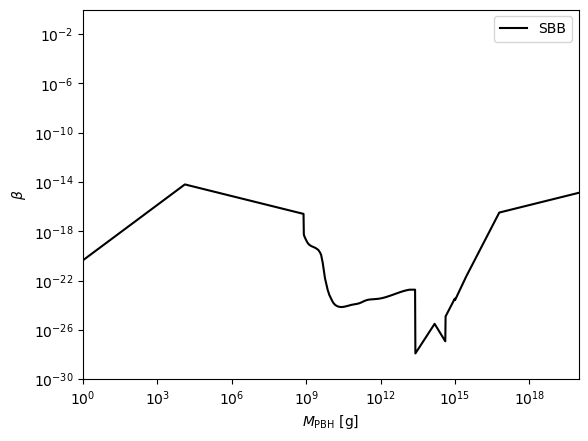

In [67]:
plt.loglog(M_pbh,betas_rd_scenario,label = "SBB",color='black')
plt.ylim([1e-30,1])
plt.xlim([1e0,1e20])
plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.legend()
plt.show()

# Early Matter Domination Era

Como primer caso en la modificación del escenario estándar, consideraremos una fase MD temprana antes de la BBN. Aquí, consideramos un escenario MD particular en el que la cantidad de radiación es consecuencia de la desintegración de una partícula hipotética, $\psi$. Esta partícula podría ser una partícula asociada con campos de módulos, o el propio campo del inflatón. También asumimos que esta era MD sigue inmediatamente después de la inflación y los PBHs se forman durante esta era.

Se deben considerar algunas diferencias entre este caso y el escenario estándar de recalentamiento instantáneo. Primero, para determinar la masa de un agujero negro a partir de una inhomogeneidad de tamaño $2\pi/k$, necesitamos reemplazar $\gamma^{(\rm RD)}$ en la eq. de masa con $\gamma^{\rm (MD)}$, y determinar el factor de Hubble, $H_{\rm HC}(k)$ de acuerdo con esta cosmología no estándar. El valor particular de $\gamma^{\rm (MD)}$ no se conoce bien y, por lo tanto, adoptamos $\gamma^{\rm (MD)} = 1$ \citep{Martin:2019nuw}.

Después de la formación de los PBHs, la evolución del parámetro de densidad, $\Omega_{\rm PBH}$ (y su relación con $\beta$), se modifica con respecto a la cosmología estándar. La función $b(t)$ se determina a través de un sistema de ecuaciones diferenciales equivalente al de Eqs.~\eqref{omx}, \eqref{eqdb} y \eqref{eqdt}, con el nuevo fluido $\Omega_{\psi}$ que domina el universo; es decir
\begin{eqnarray}\label{eq:db}
\frac{db}{d\ln \rho_{\rm tot}}+b\,\frac{\Omega_{\rm{PBH}}+\Omega_{\psi}-1}{\Omega_{\rm PBH}+\Omega_{\psi}-4} = 0\,.\\
\dfrac{d\,\Omega_{\psi}}{d\ln \rho_{\rm tot}}+ \Omega_{\psi}\,\frac{\Omega_{\rm{PBH}}+\Omega_{\psi}-1}{\Omega_{\rm PBH}+\Omega_{\psi}-4} = 0\,.\\
\dfrac{d(t-t_i)}{d\ln \rho_{\rm tot}} = \frac{\sqrt{3}m_{\rm Pl}}{(\Omega_{\rm PBH}+\Omega_{\psi}-4)\sqrt{\rho_{\rm tot}}}\,.\label{eq:dt}
\end{eqnarray}
Estas ecuaciones diferenciales deben evolucionar con condiciones iniciales adecuadas hasta la escala de energía en la que la partícula, $\psi$, decae; es decir, $\rho_{\rm tot}^{\rm (dec)} > \rho_{\rm BBN}$. Elegimos establecer condiciones iniciales similares a la cosmología estándar (Eq.\,\eqref{inicon}), y además, tenemos
\begin{equation}
\Omega_{\psi}(t_i)=1-\beta(M_{\rm PBH})\,.
\end{equation}
La condición anterior implica una contribución despreciable de la radiación en el tiempo inicial, $t_i$.


# Ejercicio 3

## Graficar todas las restricciones a la abundancia de PBHs en el escenario de Early Matter Domination.


## Hint:

`PBHBeta.BfM. get_betas_reh_tot ( N_re , omega , gam_reh )`

- Esta función contiene el cálculo de la abundancia de PBH en una era de Dominación de la Materia Temprana (MD). Esto incluye el sistema de ecuaciones que describe la evolución de la población de PBH después de su formación. 

**Parámetros:**

- N_re (flotante): es el número total de e-folds necesarios para que durara la era MD.

- omega (float): Este valor es para asignar la ecuación de estado

- gam_reh: Es una constante que cifra la eficiencia del colapso hacia una era MD. El valor particular de gamma^{MD} no es muy conocido y por lo tanto adoptamos gamma^{MD} = 1

**Salidas:**
- betas_reh_tot (lista): Contiene las abundancias totales de PBH en la era MD.

In [56]:
beta_MD_10 = BfM.get_betas_reh_tot(M_pbh,10,0,1)
beta_MD_20 = BfM.get_betas_reh_tot(M_pbh,20,0,1)
beta_MD_30 = BfM.get_betas_reh_tot(M_pbh,30,0,1)

In [ ]:
#betas_rd_scenario = functions.get_Betas_full(M_pbh)

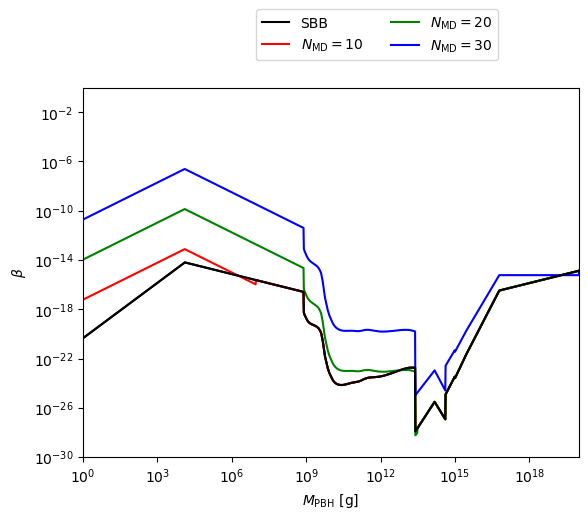

In [58]:
plt.loglog(constraints.data_M_tot,constraints.data_beta_full, label = "SBB", color='black')
plt.loglog(M_pbh,beta_MD_10, label = r"$N_{\rm MD}=10$",color='red')
plt.loglog(M_pbh,beta_MD_20, label = r"$N_{\rm MD}=20$",color='green')
plt.loglog(M_pbh,beta_MD_30, label = r"$N_{\rm MD}=30$",color='blue')
plt.loglog(constraints.data_M_tot,constraints.data_beta_full, color='black')
plt.ylim([1e-30,1])
plt.xlim([1e0,1e20])
plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")

plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.23))
plt.show()

# DOMINACIÓN DE FLUIDO TIPO STIFF (SD)

Si la ecuación de estado en el universo temprano se vuelve más rígida, el valor umbral para la formación de PBH aumenta porque, al ser mayor la presión, es más difícil colapsar y formar PBHs. En el caso límite de una ecuación de estado, $w = 1$, tenemos \citep{Dalianis:2021dbs}
\begin{equation}\label{dc_sd}
\delta_c^{\rm (SD)} = 0.52-0.75\,,
\end{equation}
y tomaremos $\delta_c^{\rm (SD)} = 0.52$.

En un escenario SD, la masa de los PBHs está dada por la Eq.\eqref{mass} reemplazando $\gamma^{(\rm RD)}$ por $\gamma^{(\rm SD)}$. El valor particular de $\gamma^{\rm (SD)}$ no se conoce bien y en este ejemplo tomaremos $\gamma^{\rm (SD)} = 1$.

La evolución de la población de PBHs después de su formación está descrita por las siguientes ecuaciones
\begin{eqnarray}\label{eqs:sd}
\Omega_{\rm PBH}(M_{\rm PBH};t) = \bar\beta(M_{\rm PBH};t)\left(1-\frac{t-t_i}{\Delta t_{\rm eva}}\right)^{1/3}\,,\\
\frac{db}{d\ln \rho_{\rm tot}}+b\,\frac{\Omega_{\rm{PBH}}-2\Omega_{\psi}-1}{\Omega_{\rm PBH}-2\Omega_{\psi}-4} = 0\,,\\
\frac{d\Omega_{\psi}}{d\ln \rho_{\rm tot}}+ \Omega_{\psi}\,\frac{\Omega_{\rm{PBH}}-2\Omega_{\psi}+2}{\Omega_{\rm PBH}-2\Omega_{\psi}-4} = 0\,,\\
\frac{d(t-t_i)}{d\ln \rho_{\rm tot}} = \frac{\sqrt{3}m_{\rm Pl}}{(\Omega_{\rm PBH}-2\Omega_{\psi}-4)\sqrt{\rho_{\rm tot}}}\,.
\end{eqnarray}

Evolucionamos este sistema de ecuaciones diferenciales con las siguientes condiciones iniciales para obtener restricciones sobre los PBHs,
\begin{eqnarray}
b(t_i) = 1\,,\ \ \ \ \ \bar \beta(M_{\rm PBH};t_i) = \beta(M_{\rm PBH})\,,\\ 
\Omega_{\psi}(t_i)=\frac{1-\beta(M_{\rm PBH})\left[1+\left(\frac{\rho_{\rm tot}(a_i)}{\rho_{\rm tot}(a_{\rm stiff})}\right)^{1/6}\right]}{1+\left(\frac{\rho_{\rm tot}(a_{\rm stiff})}{\rho_{\rm tot}(a_i)}\right)^{1/3}}\,,
\end{eqnarray}
donde $\rho_{\rm tot}(a_i)$ y $\rho_{\rm tot}(a_{\rm stiff})$ son valores del fondo de densidad en la formación y al final de la época de stiff (ademas consideramos el final de la época stiff cuando el fondo de radiación iguala la densidad del fluido tipo stiff), respectivamente.

# Ejercicio 4 

## Realizar la evaluación para un rango de masas para una evolución no estandar, tal que haya una dominación tipo Stiff (fluido rigido), considera que:

### a) La ecuación de estado para este escenario es $w = 1$

### b) Cuál sería el numero máximo de e-folds para la duración de esta etapa?

### c) El parametro $\gamma$ no es bien conocido pero podemos considerar $$\gamma = 1$$

## Hints: 

#### Beta Pbhs de Dominación de Stiff (BfS)
`PBHBeta.BfS.get_betas_stiff_tot ( M , N_stiff , w , gam_stiff )`
Esta función permite realizar el cálculo de la abundancia de PBH en una era de dominación tipo Stiff (SD). Esto incluye el sistema de ecuaciones que describe la evolución de la población de PBH después de su formación. 

**Parámetros** :
- M:  (numpy.ndarray): corresponde a las masas de PBH, restringidas y calculadas a partir de cualquier función principal.

- N_stiff (flotante): es el número total de pliegues electrónicos que duró la era rígida.

- w (float): Este valor es para asignar la ecuación de estado.

- gam_sd: Es una constante que cifra la eficiencia del colapso y para una era de dominación fluida rígida. El valor particular de gamma^{SD} no es muy conocido y por lo tanto adoptamos $\gamma^{SD} = 1$

**Salida**:
- betas_stiff (lista): contiene las abundancias totales de PBH en SD.


#### Restricciones del espectro de potencia por Dominación de Stiff rígidos (PfS)

`PBHBeta.PfS.get_P_k_SD ( M , N_sitff , w , gam_sd )`
Esta función obtiene la restricción del espectro de potencia (PS) en un escenario dominado por fluido rígido (SD)

**Parámetros:**

- M (numpy.ndarray): corresponde a las masas de PBH, restringidas y calculadas a partir de cualquier función principal.

- N_stiff (flotante): es el número total de pliegues electrónicos que duró la era rígida.

- w (float): Este valor es para asignar la ecuación de estado

- gam_sd: El valor particular de gamma^{SD} no se conoce bien y por lo tanto adoptamos gamma^{SD} = 1

**Salidas**:

- k (numpy.ndarray): Valores del número de onda en SD.

- P_k (numpy.ndarray): Valores del espectro de potencia en SD.

- betas_stiff (numpy.ndarray): Abundancias de PBH en SD.

### Metodo 1. Usando `BfS.get_betas_stiff_tot (M, N_stiff w, gam_sd) `

In [41]:
beta_s5 = BfS.get_betas_stiff_tot(M_pbh,5,1,1)
beta_s10 = BfS.get_betas_stiff_tot(M_pbh,10,1,1)
beta_s15 = BfS.get_betas_stiff_tot(M_pbh,15,1,1)

/Users/thaddaios/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(1, 1e+20)

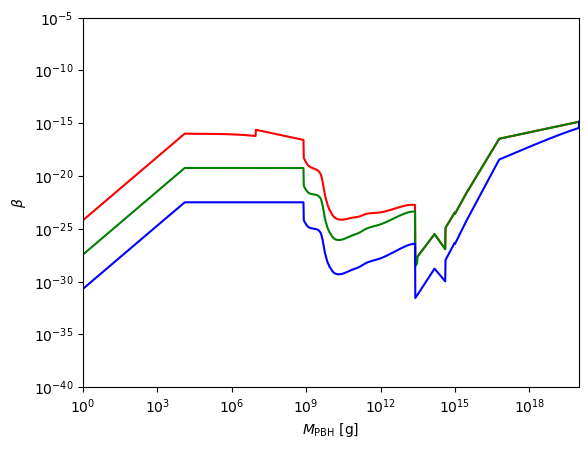

In [48]:
plt.loglog(M_pbh,beta_s5,label = r"$N_{\rm SD} = 5$", color='red')
plt.loglog(M_pbh,beta_s10,label = r"$N_{\rm SD} = 10$", color='green')
plt.loglog(M_pbh,beta_s15,label = r"$N_{\rm SD} = 15$", color='blue')

plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.ylim([1e-40,1e-5])
plt.xlim([1,1e20])

In [49]:
betas_rd_scenario = functions.get_Betas_full(M_pbh)

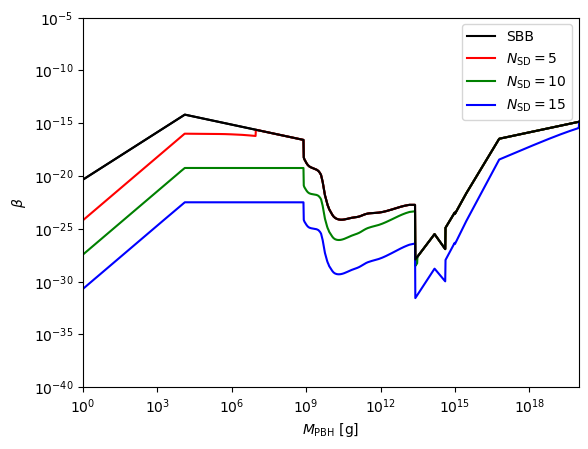

In [51]:
plt.loglog(M_pbh,betas_rd_scenario, color='black',label = "SBB")
plt.loglog(M_pbh,beta_s5,label = r"$N_{\rm SD} = 5$", color='red')
plt.loglog(M_pbh,beta_s10,label = r"$N_{\rm SD} = 10$", color='green')
plt.loglog(M_pbh,beta_s15,label = r"$N_{\rm SD} = 15$", color='blue')
plt.loglog(M_pbh,betas_rd_scenario, color ='black')

plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.ylim([1e-40,1e-5])
plt.xlim([1,1e20])
plt.legend()
plt.show()

### Metodo 2. Usando `PfS.get_P_k_SD ( M , N_sitff , w , gam_sd )`

In [68]:
_, _, beta_s5 = PfS.get_P_k_SD(M_pbh,5,1,1)
_, _, beta_s10 = PfS.get_P_k_SD(M_pbh,10,1,1)
_, _, beta_s15 = PfS.get_P_k_SD(M_pbh,15,1,1)

/Users/thaddaios/Documents/PBHBeta_BASE/PBHBeta-main/PBHBeta/BfS.py:84: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 =  beta0*b*(1.-time/Delta_t)**(1./3)
/Users/thaddaios/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


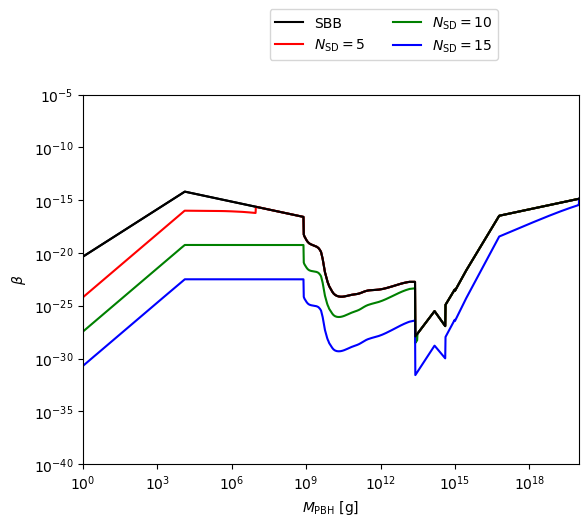

In [69]:
plt.loglog(M_pbh, betas_rd_scenario, color='black',label = "SBB")
plt.loglog(M_pbh,beta_s5,label = r"$N_{\rm SD} = 5$", color='red')
plt.loglog(M_pbh,beta_s10,label = r"$N_{\rm SD} = 10$", color='green')
plt.loglog(M_pbh,beta_s15,label = r"$N_{\rm SD} = 15$", color='blue')
plt.loglog(M_pbh,betas_rd_scenario, color ='black')

plt.xlabel(r"$M_{\rm PBH}~[\rm{g}]$")
plt.ylabel(r"$\beta$")
plt.ylim([1e-40,1e-5])
plt.xlim([1,1e20])

plt.legend(ncol=2,bbox_to_anchor=(0.85, 1.25))


plt.show()

# Ejercicio 5 (TAREA)

### Graficar las restricciones en SD  y evaluar para los siguientes numeros de e-folds: N=1, 3, 7, 11 y 17.

### Si consideramos un valor diferente para el parametro de optimización de colapso 
$$\gamma^{SD}$$ 
### ¿Cómo se verian afectadas las abundancias?

In [93]:
beta_SD_1 = BfS.get_betas_stiff_tot(M_pbh,1,1,.5)
beta_SD_3 = BfS.get_betas_stiff_tot(M_pbh,3,1,.5)
beta_SD_7 = BfS.get_betas_stiff_tot(M_pbh,7,1,.5)
beta_SD_11 = BfS.get_betas_stiff_tot(M_pbh,11,1,.5)
beta_SD_17 = BfS.get_betas_stiff_tot(M_pbh,17,1,.5)

/Users/thaddaios/Documents/PBHBeta_BASE/PBHBeta-main/PBHBeta/BfS.py:84: RuntimeWarning: invalid value encountered in double_scalars
  Om_0 =  beta0*b*(1.-time/Delta_t)**(1./3)
/Users/thaddaios/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


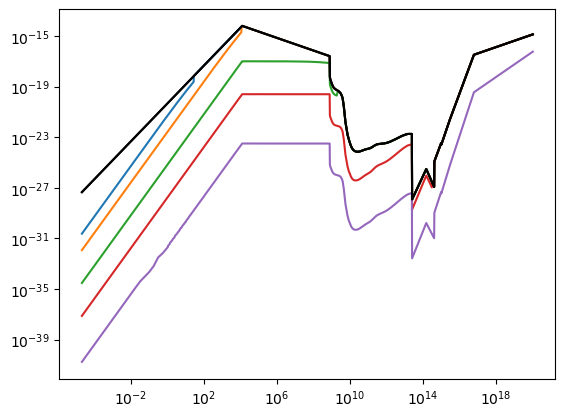

In [94]:
plt.loglog(M_pbh, beta_bbn_SD_1)
plt.loglog(M_pbh, beta_bbn_SD_3)
plt.loglog(M_pbh, beta_bbn_SD_7)
plt.loglog(M_pbh, beta_bbn_SD_11)
plt.loglog(M_pbh, beta_bbn_SD_17)
plt.loglog(M_pbh, functions.get_Betas_full(M_pbh), color='black')
plt.loglog(M_pbh,betas_rd_scenario, color ='black')

In [96]:
beta_SD_1 = PfS.get_P_k_SD(M_pbh,1,1,.5)[2]
beta_SD_3 = PfS.get_P_k_SD(M_pbh,3,1,.5)[2]
beta_SD_7 = PfS.get_P_k_SD(M_pbh,7,1,.5)[2]
beta_SD_11 = PfS.get_P_k_SD(M_pbh,11,1,.5)[2]
beta_SD_17 = PfS.get_P_k_SD(M_pbh,17,1,.5)[2]

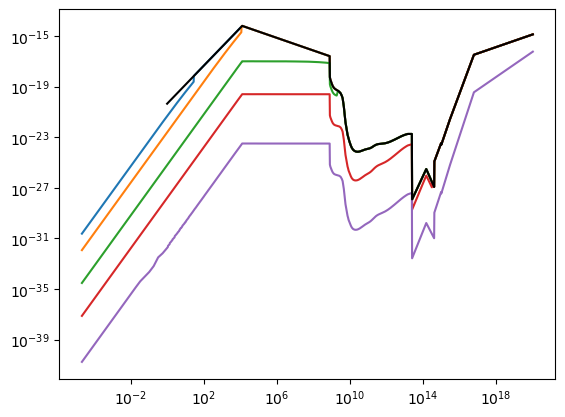

In [97]:
plt.loglog(M_pbh, beta_bbn_SD_1)
plt.loglog(M_pbh, beta_bbn_SD_3)
plt.loglog(M_pbh, beta_bbn_SD_7)
plt.loglog(M_pbh, beta_bbn_SD_11)
plt.loglog(M_pbh, beta_bbn_SD_17)

plt.loglog(constraints.data_M_tot,constraints.data_beta_full, color='black',label = "SBB")
